In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ticker = 'SPY'
days = 90

# Loading

In [ ]:
present = datetime.datetime.now().date()
past = present - datetime.timedelta(days = days)
print("Trades from {} to {}".format(past, present))

Trades from 2022-08-25 to 2022-11-23


In [ ]:
# Gets url response
res = requests.get("https://api.polygon.io/v2/aggs/ticker/{}/range/1/hour/{}/{}?adjusted=true&sort=asc&limit=50000&apiKey=yuasIoFiphAuTZl8p0_ohMDGYCIzpzVF".format(ticker, past, present))

# Parses the text response in dataframe
df = pd.read_json(res.text)

df

,ticker,queryCount,resultsCount,adjusted,results,status,request_id,count
0,SPY,50000,911,True,"{'v': 67519, 'vw': 417.4876, 'o': 417.63, 'c':...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
1,SPY,50000,911,True,"{'v': 45973, 'vw': 416.1376, 'o': 417.24, 'c':...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
2,SPY,50000,911,True,"{'v': 115539, 'vw': 415.8465, 'o': 415.5, 'c':...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
3,SPY,50000,911,True,"{'v': 122603, 'vw': 415.9794, 'o': 415.87, 'c'...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
4,SPY,50000,911,True,"{'v': 557687, 'vw': 415.5209, 'o': 415.86, 'c'...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
...,...,...,...,...,...,...,...,...
906,SPY,50000,911,True,"{'v': 8357153.0, 'vw': 397.6627, 'o': 398.425,...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
907,SPY,50000,911,True,"{'v': 6283125.0, 'vw': 398.5532, 'o': 397.8899...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
908,SPY,50000,911,True,"{'v': 6104561.0, 'vw': 399.4797, 'o': 398.62, ...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911
909,SPY,50000,911,True,"{'v': 6010217.0, 'vw': 399.3864, 'o': 400.1, '...",DELAYED,0f7ba0699ec49e4b4420f33855896c0b,911


# Cleaning

In [ ]:
# Preview of [results] column

df["results"][0]

{'v': 67519,
 'vw': 417.4876,
 'o': 417.63,
 'c': 417.21,
 'h': 417.91,
 'l': 416.57,
 't': 1661414400000,
 'n': 614}

In [ ]:
# Gets total length of the data

DF_LENGTH = len(df)

In [ ]:
# Parses the [results] column into a seperate dataframe 

df_aug = pd.DataFrame([df["results"][0]])

for i in range(1, DF_LENGTH):
    df_curr = pd.DataFrame([df["results"][i]])
    df_aug = df_aug.append(df_curr, ignore_index=True)
    
df_aug

,v,vw,o,c,h,l,t,n
0,67519.0,417.4876,417.6300,417.2100,417.9100,416.57,1661414400000,614
1,45973.0,416.1376,417.2400,415.6100,417.2600,415.39,1661418000000,447
2,115539.0,415.8465,415.5000,415.9500,416.0200,415.43,1661421600000,575
3,122603.0,415.9794,415.8700,416.1300,416.5200,415.31,1661425200000,1120
4,557687.0,415.5209,415.8600,415.4300,417.5300,414.60,1661428800000,3796
...,...,...,...,...,...,...,...,...
906,8357153.0,397.6627,398.4250,397.8900,398.6200,396.35,1668441600000,70068
907,6283125.0,398.5532,397.8899,398.6200,399.2300,397.39,1668445200000,51223
908,6104561.0,399.4797,398.6200,400.1001,400.1700,398.39,1668448800000,54323
909,6010217.0,399.3864,400.1000,398.7500,400.1799,398.53,1668452400000,55967


In [ ]:
# drops the [vw], [n] columns

df_dropped = df_aug.drop(['vw','n'],axis=1)

df_dropped

,v,o,c,h,l,t
0,67519.0,417.6300,417.2100,417.9100,416.57,1661414400000
1,45973.0,417.2400,415.6100,417.2600,415.39,1661418000000
2,115539.0,415.5000,415.9500,416.0200,415.43,1661421600000
3,122603.0,415.8700,416.1300,416.5200,415.31,1661425200000
4,557687.0,415.8600,415.4300,417.5300,414.60,1661428800000
...,...,...,...,...,...,...
906,8357153.0,398.4250,397.8900,398.6200,396.35,1668441600000
907,6283125.0,397.8899,398.6200,399.2300,397.39,1668445200000
908,6104561.0,398.6200,400.1001,400.1700,398.39,1668448800000
909,6010217.0,400.1000,398.7500,400.1799,398.53,1668452400000


In [ ]:
# Renames all columns in place

df_dropped.rename(columns = {'v':'Volume', 'o':'Open', 'c':'Close', 'h':'Highest', 'l':'Lowest', 't':'Timestamp',}, inplace = True)

df_dropped

,Volume,Open,Close,Highest,Lowest,Timestamp
0,67519.0,417.6300,417.2100,417.9100,416.57,1661414400000
1,45973.0,417.2400,415.6100,417.2600,415.39,1661418000000
2,115539.0,415.5000,415.9500,416.0200,415.43,1661421600000
3,122603.0,415.8700,416.1300,416.5200,415.31,1661425200000
4,557687.0,415.8600,415.4300,417.5300,414.60,1661428800000
...,...,...,...,...,...,...
906,8357153.0,398.4250,397.8900,398.6200,396.35,1668441600000
907,6283125.0,397.8899,398.6200,399.2300,397.39,1668445200000
908,6104561.0,398.6200,400.1001,400.1700,398.39,1668448800000
909,6010217.0,400.1000,398.7500,400.1799,398.53,1668452400000


In [ ]:
# Converts Unix timestamp to Datetime

df_dropped['Timestamp'] = pd.to_datetime(df_dropped['Timestamp'],unit='ms')

df_dropped

,Volume,Open,Close,Highest,Lowest,Timestamp
0,67519.0,417.6300,417.2100,417.9100,416.57,2022-08-25 08:00:00
1,45973.0,417.2400,415.6100,417.2600,415.39,2022-08-25 09:00:00
2,115539.0,415.5000,415.9500,416.0200,415.43,2022-08-25 10:00:00
3,122603.0,415.8700,416.1300,416.5200,415.31,2022-08-25 11:00:00
4,557687.0,415.8600,415.4300,417.5300,414.60,2022-08-25 12:00:00
...,...,...,...,...,...,...
906,8357153.0,398.4250,397.8900,398.6200,396.35,2022-11-14 16:00:00
907,6283125.0,397.8899,398.6200,399.2300,397.39,2022-11-14 17:00:00
908,6104561.0,398.6200,400.1001,400.1700,398.39,2022-11-14 18:00:00
909,6010217.0,400.1000,398.7500,400.1799,398.53,2022-11-14 19:00:00


In [ ]:
df_dropped['Hour'] = df_dropped.Timestamp.dt.hour
df_dropped['Hour'].head()

0     8
1     9
2    10
3    11
4    12
Name: Hour, dtype: int64

In [ ]:
# get info for regular market hours only (from 9 a.m. to 4 p.m. ET.)
print('Shape before drop:', df_dropped.shape)
df_dropped = df_dropped[df_dropped['Hour'].between(9, 16)]
print('Shape after drop:', df_dropped.shape)

Shape before drop: (911, 7)
Shape after drop: (456, 7)


In [ ]:
df_dropped['Profit'] = df_dropped.apply(lambda row: row['Close'] - row['Open'], axis=1)
df_dropped['Profit'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1   -1.63
2    0.45
3    0.26
4   -0.43
5    1.00
Name: Profit, dtype: float64

In [ ]:
df_dropped

,Volume,Open,Close,Highest,Lowest,Timestamp,Hour,Profit
1,45973.0,417.240,415.6100,417.26,415.39,2022-08-25 09:00:00,9,-1.6300
2,115539.0,415.500,415.9500,416.02,415.43,2022-08-25 10:00:00,10,0.4500
3,122603.0,415.870,416.1300,416.52,415.31,2022-08-25 11:00:00,11,0.2600
4,557687.0,415.860,415.4300,417.53,414.60,2022-08-25 12:00:00,12,-0.4300
5,4280978.0,415.400,416.4000,416.52,414.09,2022-08-25 13:00:00,13,1.0000
...,...,...,...,...,...,...,...,...
902,136307.0,396.960,397.5700,397.60,396.80,2022-11-14 12:00:00,12,0.6100
903,426336.0,397.550,397.0400,397.91,396.50,2022-11-14 13:00:00,13,-0.5100
904,7891854.0,397.080,397.1255,397.80,395.92,2022-11-14 14:00:00,14,0.0455
905,9552459.0,397.140,398.4300,398.97,397.13,2022-11-14 15:00:00,15,1.2900


# Exploratory Analysis

In [ ]:
df_dropped.describe()

,Volume,Open,Close,Highest,Lowest,Hour,Profit
count,4.560000e+02,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,5.318951e+06,381.552660,381.525120,382.776331,380.227778,12.500000,-0.027541
std,5.623612e+06,15.310298,15.188591,15.093298,15.392163,2.293804,1.776107
min,8.333000e+03,349.900000,349.900000,352.500000,348.110000,9.000000,-11.708200
25%,1.881550e+05,369.107500,369.080000,370.712500,367.485000,10.750000,-0.815000
50%,3.063344e+06,380.305000,380.760000,381.515000,378.945000,12.500000,0.005150
75%,9.562665e+06,394.070000,393.880000,394.850000,392.283225,14.250000,0.815000
max,3.180131e+07,419.450000,419.450000,421.020000,418.050000,16.000000,11.170000


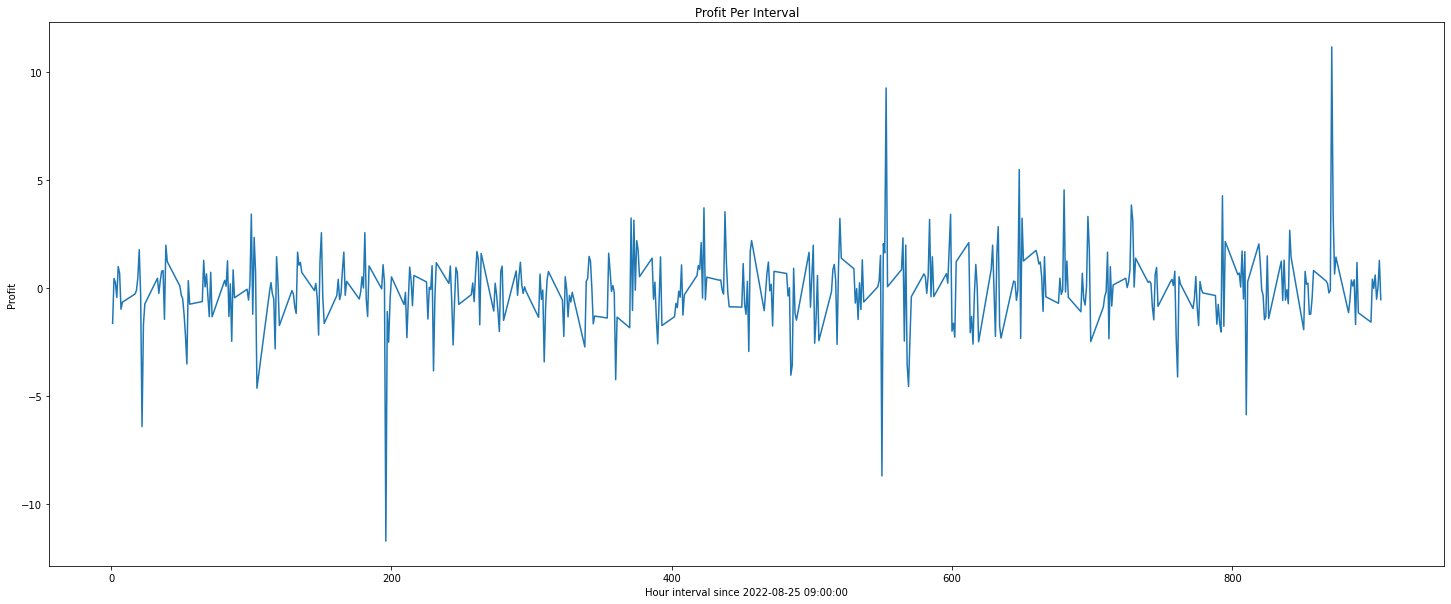

In [ ]:
df_dropped['Profit'].plot(figsize=(25, 10), \
                          title="Profit Per Interval", \
                          xlabel="Hour interval since {}".format(df_dropped.iloc[0]['Timestamp']), \
                          ylabel = 'Profit')

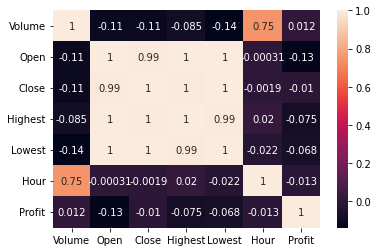

In [ ]:
sns.heatmap(df_dropped.corr(), annot=True)